<a href="https://colab.research.google.com/github/mydmitrii/DS_projects/blob/main/Heart_Attack_Analysis%26Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Прогнозирование риска сердечного приступа

Выложил датасет на гуглдиск

In [ ]:
!gdown 1-fDhAg9urf39-4EYSzEnPRvzwDlz-kL8

Downloading...
From: https://drive.google.com/uc?id=1-fDhAg9urf39-4EYSzEnPRvzwDlz-kL8
To: /content/heart.csv
100% 11.3k/11.3k [00:00<00:00, 13.3MB/s]


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

# Считываем данные
df = pd.read_csv("/content/heart.csv")

# Первичное исследование данных

In [ ]:
df.head() #первые 5 строк датасета

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape #кол-во строк и столбцов

(303, 14)

In [ ]:
df.describe() #основные статистики по столбцам

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Производим первичный анализ данных:
- возраст 29-77 лет
- 2 пола, мужской и женский
- артериальное давление 126.6-200
- холестерин 126-564
- диапазон значений cp, fbs, restecg и прочие соответствуют исходным данным

С точки зрения здравого смысла никаких аномалий в данных не выявлено


In [ ]:
df.info() #проверим на наличие пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Значит пропуски в датасете отсутсвуют. Поэтому нет необходимости в команде df.dropna()

In [ ]:
df.dtypes #проверим типы данных

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [ ]:
df[df.duplicated()] #проверим наличие дубликатов

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Видим, что в датасете имеются дубликаты

In [ ]:
df.drop_duplicates(inplace=True) #удалим дубликаты

In [ ]:
df.shape #проверим новое количество строк и столбцов

(302, 14)

Строк стало на одну меньше

# EDA. Разведочный анализ данных

Сгруппируем данные в зависимости от пола

In [ ]:
columns_to_show = ['age', 'trtbps', 'chol', 'thalachh' ]

df.groupby(['sex'])[columns_to_show].describe(percentiles=[])

age                                        trtbps              \
     count       mean       std   min   50%   max  count        mean   
sex                                                                    
0     96.0  55.677083  9.409396  34.0  57.0  76.0   96.0  133.083333   
1    206.0  53.834951  8.836838  29.0  54.5  77.0  206.0  130.912621   

                      ...       chol                      thalachh             \
           std   min  ...        std    min    50%    max    count       mean   
sex                   ...                                                       
0    19.311119  94.0  ...  65.088946  141.0  253.0  564.0     96.0  151.12500   
1    16.691524  94.0  ...  42.649757  126.0  235.0  353.0    206.0  148.84466   

                                    
           std   min    50%    max  
sex                                 
0    20.047969  96.0  157.0  192.0  
1    24.131048  71.0  150.5  202.0  

[2 rows x 24 columns]

Мы видим, что пол 1 превалирует над полом 0. Визуализируем число людей разного пола

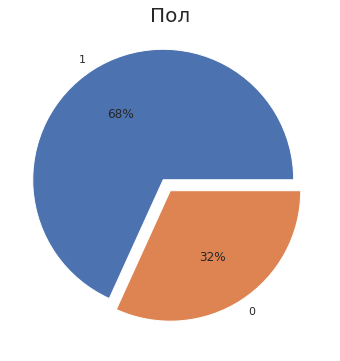

In [ ]:
from matplotlib import pyplot as plt

sns.set_theme(style="whitegrid")

plt.figure(figsize=(6,6))
myexplod=[.1,0]
plt.pie(x=df['sex'].value_counts().values,
    labels=df['sex'].value_counts().index,
       autopct='%.0f%%',explode=myexplod)
plt.title('Пол',size=20)

plt.show()

Выведем распределение влияния пола на риск сердечного приступа

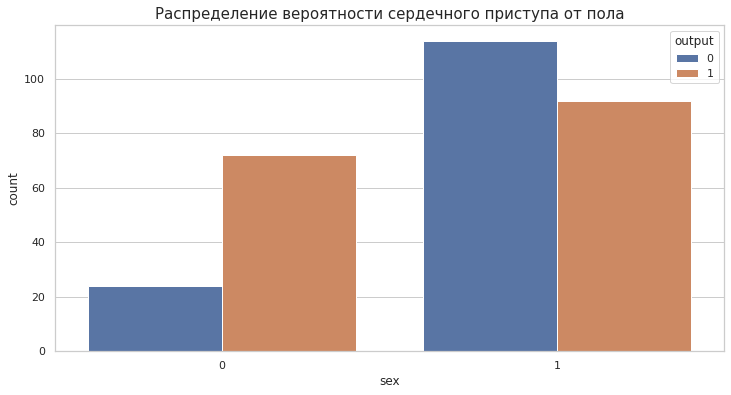

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Распределение вероятности сердечного приступа от пола",size=15)
sns.countplot(data=df, x = "sex", hue = "output")

plt.show()

Выведем распределение влияния числа крупных сосудов на риск сердечного приступа

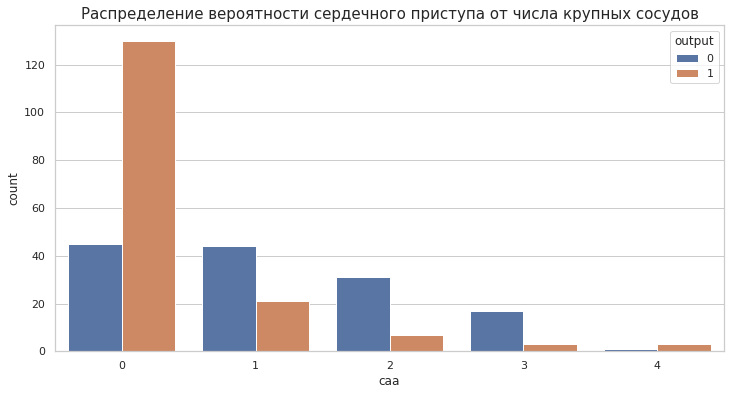

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Распределение вероятности сердечного приступа от числа крупных сосудов",size=15)
sns.countplot(data=df, x = "caa", hue = "output")

plt.show()

Выведем распределение влияния остальных признаков на появление сердечного приступа

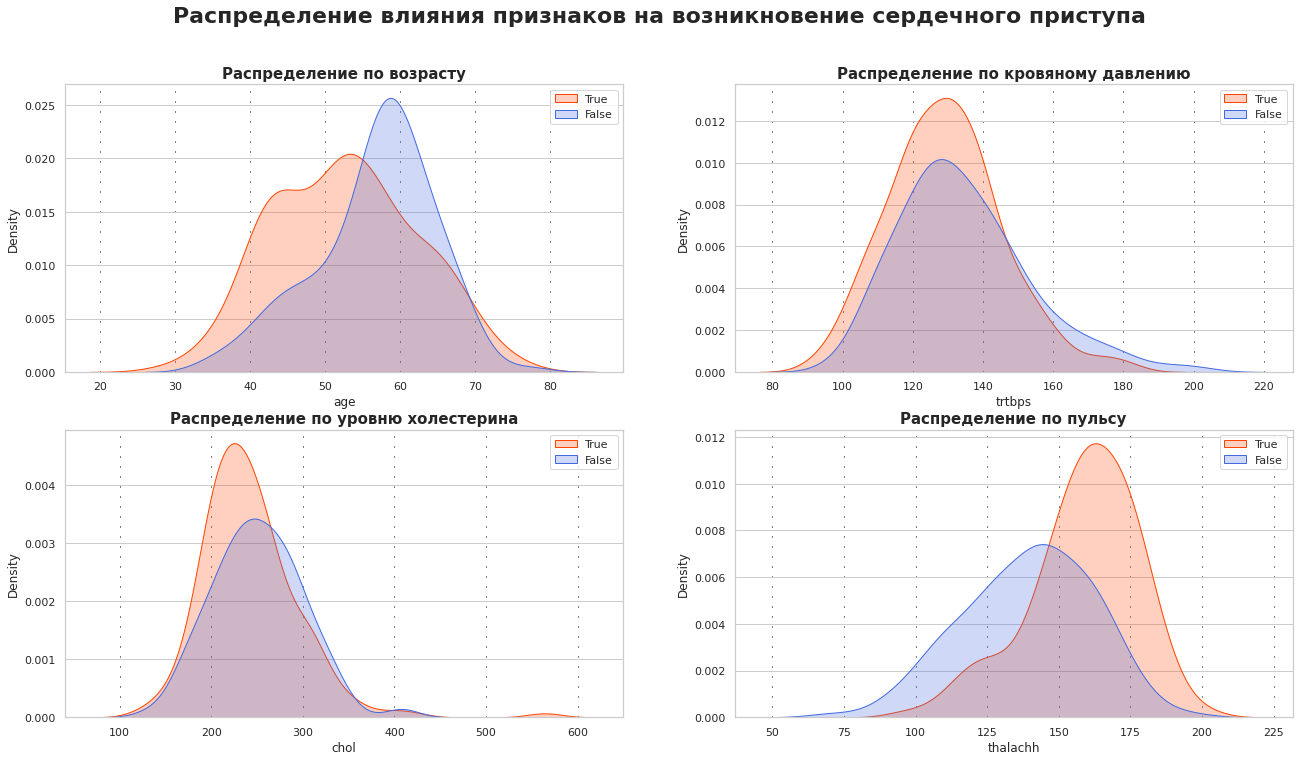

In [ ]:
fig = plt.figure(figsize=(22,18))
gs  = fig.add_gridspec(3,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])

fig.suptitle(t='Распределение влияния признаков на возникновение сердечного приступа',y=0.94, fontweight ="bold",fontsize=22)

# Возраст
ax1.set_title('Распределение по возрасту',fontweight ="bold",fontsize=15)
ax1.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
sns.kdeplot(ax=ax1,data=df,x='age', hue='output', fill=True, palette = ['royalblue','orangered'])
ax1.legend([True, False])

# Кровяное давление
ax2.set_title('Распределение по кровяному давлению',fontweight ="bold",fontsize=15)
ax2.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
sns.kdeplot(ax=ax2,data=df,x='trtbps', hue='output', fill=True, palette = ['royalblue','orangered'])
ax2.legend([True, False])

# Холестерин
ax3.set_title('Распределение по уровню холестерина',fontweight ="bold",fontsize=15)
ax3.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
sns.kdeplot(ax=ax3,data=df,x='chol', hue='output', fill=True, palette = ['royalblue','orangered'])
ax3.legend([True, False])

# Пульс
ax4.set_title('Распределение по пульсу',fontweight ="bold",fontsize=15)
ax4.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
sns.kdeplot(ax=ax4,data=df,x='thalachh', hue='output', fill=True, palette = ['royalblue','orangered'])
ax4.legend([True, False])

plt.show()

Составим матрицу корреляций признаков

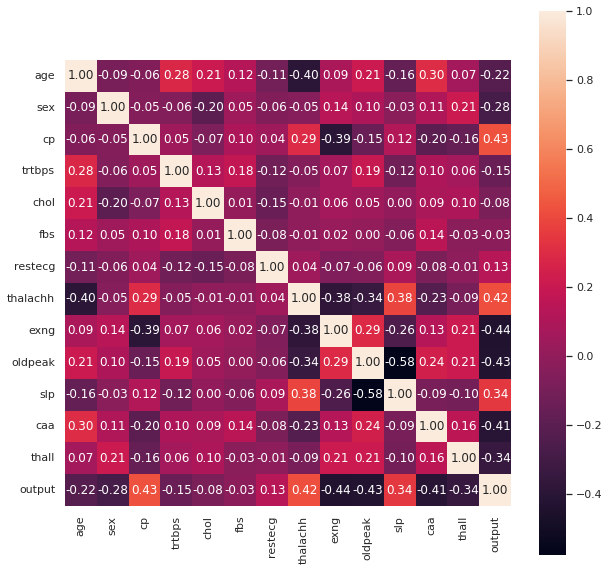

In [ ]:
plt.subplots(figsize=(10,10))

sns.heatmap(df.corr(), fmt=".2f", annot=True, square=True)
plt.show()

Как видно по тепловой карте, некоторые признаки: Холестерин (chol) и уровень сахара в крови (fbs) незначительно влияют на риск сердечного приступа.

На риск сердечного приступа больше всего влияют: стенокардия (exang), пульс (thall) и количество крупных сосудов (caa). Вероятность сердечного приступа растет при числе крупных сосудов 0  и 4.

Также на вероятность сердечного приступа влияет пол, у мужчин риск сердечного приступа выше чем у женщин

# **Обучение KNN**



# Предобработка

Так как все признаки числовые, то нет необходимости использовать one-hot/label encoder


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # функция разделения на train test
from sklearn.metrics import accuracy_score # доля верно угаданных ответов

knn = KNeighborsClassifier()

In [ ]:
X = df.drop(columns = 'output')
y = df['output']

In [ ]:
# Разбиваем матрицу признаков и ответы на обучающую и тестовую выборки в соотношении 80/20. Посмотрим на число строк и столбцов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

X_train : (241, 13)
X_test : (61, 13)
y_train : (241,)
y_test : (61,)


In [ ]:
# обучаем алгоритм на train
knn.fit(X_train, y_train)
# получаем прогнозы на основе признаков test
preds = knn.predict(X_test)
# сравниваем полученные прогнозы с реальными ответами test с помощью метрик качества

# количество верно угаданных / количество всех ответов
accuracy_score(y_test, preds)

0.639344262295082

Произведем нормализацию признаков

In [ ]:
from sklearn.preprocessing import scale
X = scale(np.array(X, dtype='float'), with_std=True, with_mean=True)

In [ ]:
X

array([[ 0.94979429,  0.68265615,  1.97647049, ..., -2.27118179,
        -0.71491124, -2.1479552 ],
       [-1.92854796,  0.68265615,  1.005911  , ..., -2.27118179,
        -0.71491124, -0.51399432],
       [-1.48572607, -1.46486632,  0.0353515 , ...,  0.97951442,
        -0.71491124, -0.51399432],
       ...,
       [ 1.50332164,  0.68265615, -0.93520799, ..., -0.64583368,
         1.27497996,  1.11996657],
       [ 0.28556146,  0.68265615, -0.93520799, ..., -0.64583368,
         0.28003436,  1.11996657],
       [ 0.28556146, -1.46486632,  0.0353515 , ..., -0.64583368,
         0.28003436, -0.51399432]])

Снова обучим алгоритм, но уже с нормализованными признаками

In [ ]:
# Разбиваем матрицу признаков и ответы на обучающую и тестовую выборки в соотношении 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# обучаем алгоритм на train
knn.fit(X_train, y_train)
# получаем прогнозы на основе признаков test
preds = knn.predict(X_test)
# сравниваем полученные прогнозы с реальными ответами test с помощью метрик качества

# количество верно угаданных / количество всех ответов
accuracy_score(y_test, preds)

0.8524590163934426

accuracy_score алгоритма стал выше

# Подбор параметра n_neighbors для KNeighborsClassifier





Подберем значение гиперпараметра - "число соседей", на основе которого алгоритм принимает решение.

Подберем лучшее значение n_neighbors с помощью кросс-валидации на 5 фолдах

In [ ]:
from sklearn.model_selection import GridSearchCV #модуль для работы с кросс-валидацией

# Зададим сетку - среди каких значений выбирать наилучший параметр.
knn_grid = {'n_neighbors': np.array(np.linspace(15, 50, 35), dtype='int'),}
            #'metric': ['minkowski', 'euclidean']} # перебираем по параметру <<n_neighbors>>, по сетке заданной np.linspace(2, 100, 10)

# Создаем объект кросс-валидации
gs = GridSearchCV(knn, knn_grid, cv=5, n_jobs=-1)

# Обучаем его
gs.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=28), n_jobs=-1,
             param_grid={'n_neighbors': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       50])})

In [ ]:
pd.DataFrame(gs.cv_results_).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002137,0.000532,0.006618,0.001933,15,{'n_neighbors': 15},0.836066,0.901639,0.816667,0.850000,0.733333,0.827541,0.054883,15
1,0.001735,0.000051,0.007361,0.002384,16,{'n_neighbors': 16},0.852459,0.901639,0.800000,0.850000,0.733333,0.827486,0.057008,16
2,0.002854,0.001468,0.006326,0.001294,17,{'n_neighbors': 17},0.836066,0.885246,0.816667,0.850000,0.716667,0.820929,0.056745,26
3,0.001770,0.000053,0.005497,0.000107,18,{'n_neighbors': 18},0.868852,0.885246,0.800000,0.866667,0.716667,0.827486,0.062640,16
4,0.001846,0.000106,0.006459,0.001605,19,{'n_neighbors': 19},0.852459,0.868852,0.816667,0.866667,0.733333,0.827596,0.050698,12
5,0.002427,0.001349,0.008896,0.004799,20,{'n_neighbors': 20},0.852459,0.868852,0.800000,0.883333,0.733333,0.827596,0.054907,12
6,0.001886,0.000193,0.006256,0.000576,21,{'n_neighbors': 21},0.852459,0.868852,0.833333,0.866667,0.733333,0.830929,0.050417,7
7,0.003634,0.002787,0.008299,0.004473,22,{'n_neighbors': 22},0.852459,0.901639,0.833333,0.883333,0.733333,0.840820,0.058739,3
8,0.001932,0.000170,0.007402,0.002325,23,{'n_neighbors': 23},0.852459,0.868852,0.833333,0.866667,0.733333,0.830929,0.050417,7
9,0.001729,0.000109,0.005898,0.000138,24,{'n_neighbors': 24},0.852459,0.868852,0.833333,0.866667,0.733333,0.830929,0.050417,7


Построим график зависимости качества в зависимости от числа соседей

In [ ]:
def grid_plot(x, y, x_label, title, y_label='cross_val'):
    plt.figure(figsize=(15, 6))
    plt.grid(True)
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

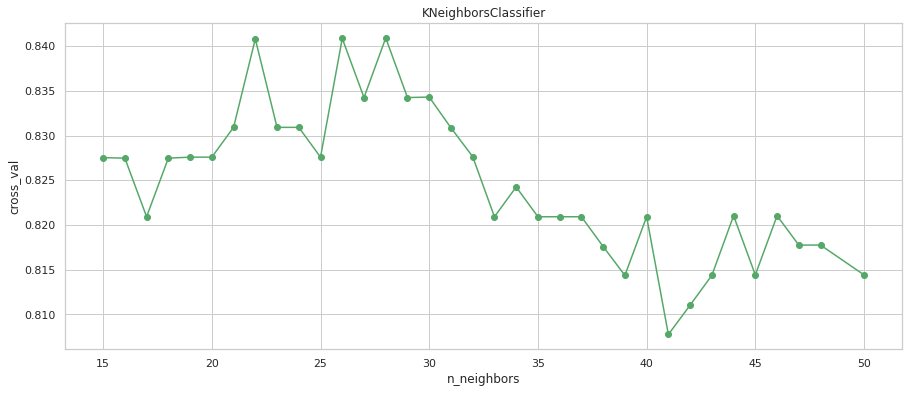

In [ ]:
grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

Подберем лучшее значение гиперпараметра n_neighbors при котором получается лучший accuracy_score, что также соответствует и графику выше

In [ ]:
# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
gs.best_params_, gs.best_score_

({'n_neighbors': 28}, 0.8409289617486339)

In [ ]:
best_number = gs.best_params_.get('n_neighbors')
best_number

28

Снова обучим модель, но уже с лучшим значением n_neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_number)

# обучаем алгоритм на train
knn.fit(X_train, y_train)
# получаем прогнозы на основе признаков test
preds = knn.predict(X_test)
# сравниваем полученные прогнозы с реальными ответами test с помощью метрик качества

# количество верно угаданных / количество всех ответов
accuracy_score(y_test, preds)

0.8524590163934426

# Оценка алгоритма. Метрики

Используем 2 классификатора

*   умный kNN
*   глупый -- DummyClassifier (самый популярный класс)

In [ ]:
from sklearn import dummy

# импортируем и создаем knn классификатор по аналогии
knn = KNeighborsClassifier(n_neighbors=best_number)
# тренируем для knn и для dummy
clf_knn = knn.fit(X_train, y_train)
clf_mp = dummy.DummyClassifier().fit(X_train, y_train)

In [ ]:
# получаем от них предикты
y_knn = clf_knn.predict(X_test)
y_mp = clf_mp.predict(X_test)

In [ ]:
# ответы dummy
y_mp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# ответы knn
y_knn

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [ ]:
# реальные ответы
y_test.to_numpy()

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

Видим насколько сильно ответы dummy отличаются от реальных

Выведем метрики для умного KNN, с лучшим значением n_neighbors, и для dummy

In [ ]:
# accuracy
from sklearn import metrics

print ('knn =', metrics.accuracy_score(y_test, y_knn), 'mp =', metrics.accuracy_score(y_test, y_mp))

knn = 0.8524590163934426 mp = 0.5081967213114754


In [ ]:
# precision
print ('knn =', metrics.precision_score(y_test, y_knn), 'mp =', metrics.precision_score(y_test, y_mp))

knn = 0.84375 mp = 0.5081967213114754


In [ ]:
# recall
print ('knn =', metrics.recall_score(y_test, y_knn), 'mp =', metrics.recall_score(y_test, y_mp))

knn = 0.8709677419354839 mp = 1.0


In [ ]:
# f1 score
print ('knn =', metrics.f1_score(y_test, y_knn), 'mp =', metrics.f1_score(y_test, y_mp))

knn = 0.8571428571428571 mp = 0.673913043478261


Проведя оценку алгоритма по accuracy, precision, recall, f1 score видим насколько более точно работает умный алгоритм KNN в отличие от для алгоритма dummy

Оценим качество классификации используя AUC-ROC кривую

ROC AUC = 0.8522


Text(0.5, 0, 'False Positive Rate')

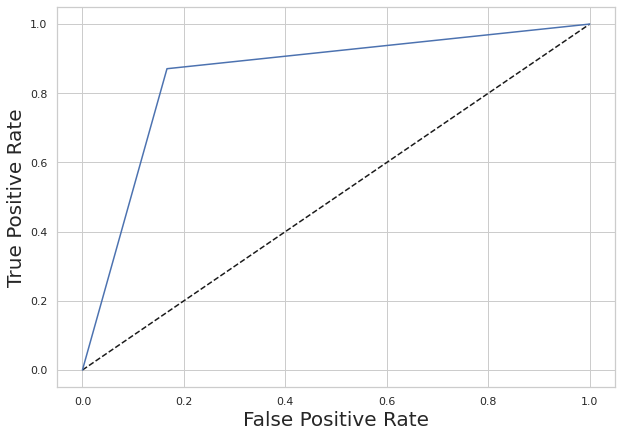

In [ ]:
# строим ROC кривую для умного KNN, чтоб посмотреть как справляемся с данными

fpr, tpr, _ = metrics.roc_curve(y_test, y_knn)
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(metrics.auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

ROC AUC = 0.5000


Text(0.5, 0, 'False Positive Rate')

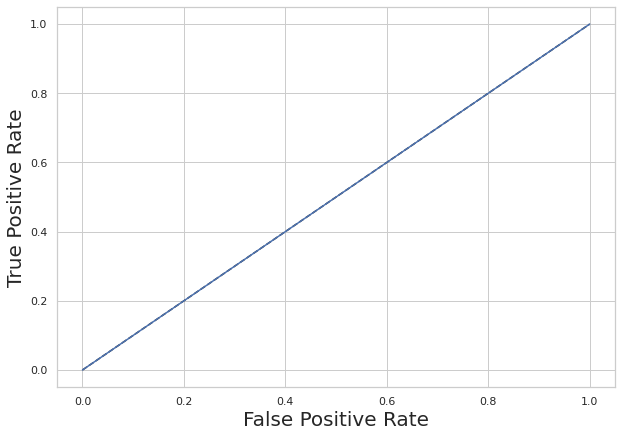

In [ ]:
# строим ROC кривую для dummy, чтоб посмотреть как справляемся с данными

fpr, tpr, _ = metrics.roc_curve(y_test, y_mp)
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(metrics.auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

По данным графикам мы видим насколько выше качество классификатора KNN над Dummy классификацией

# Дополнительно. Перебор параметров, отличного от KNN

Проверим на алгоритме Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

model.fit(X_train,y_train)
rf=model.predict(X_test)
print("accuracy =",metrics.accuracy_score(y_test,rf))

accuracy = 0.8524590163934426


Accuracy алгоритма RandomForest получился немного ниже, чем у алгоритма KNN